In [1]:
import sys
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("/home/share/libraries/bdpy")
import bdpy
from bdpy.preproc import select_top
from bdpy.ml import add_bias, make_cvindex
from bdpy.stats import corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC

In [15]:
v_spec = np.load("ventricle_spectrum.npy")
a_spec = np.load("article_spectrum.npy")
# list for sampling features
NUM_FEATURES = [i for i in range(1, 100)] + [i * 50 for i in range(2, 45)]

In [36]:
# ventricle: 0, article: 1
# choose 71 samples from vertricle and make test data and label data
def make_dataset(v_spec, a_spec, shuffle=False):
    """
    choose 71 samples from vertricle and make test data and label data
    """
    N = a_spec.shape[0]
    choice = np.random.choice(v_spec.shape[0], N)
    v_spec_random = v_spec[choice]
    data = np.vstack((v_spec_random, a_spec))
    # create dataset and labels(v: 0, a:1)
    label = label = np.array([0] * N + [1] * N)
    # shuffle data and label if shuffle == True
    if shuffle:
        random_index = [i for i in range(data.shape[0])]
        random.shuffle(random_index)
        data = data[random_index]
        label = label[random_index]
    return data, label

In [17]:
def cross_validation(data, label, n=10):
    """
    return list of train_data, test_data, train_label, test_label
    
    return
        list: list of shape(n, 4)
    """
    index = np.arange(data.shape[0])
    index = index % n
    cvindex = make_cvindex(index)
    cvindex = np.array(cvindex)
    cross_valid = []
    for i in range(cvindex.shape[2]):
        train_data = data[cvindex[0][:, i] == True]
        test_data = data[cvindex[1][:, i] == True]
        train_label = label[cvindex[0][:, i] == True]
        test_label = label[cvindex[1][:, i] == True]
        cross_valid.append((train_data, test_data, train_label, test_label))
    return cross_valid

In [18]:
# use linar SVM and calculate the score
def classify(train_data, test_data, train_label, test_label, n_features):
    # scale data
    scaler = StandardScaler()
    scaler.fit(train_data)
    scaled_train_data = scaler.transform(train_data)
    scaled_test_data = scaler.transform(test_data)
    # train classifier
    clf = LinearSVC()
    # use n_features
    clf.fit(scaled_train_data[:, : n_features], train_label)
    # get score
    score = clf.score(scaled_test_data[:, :n_features], test_label)
    return score

In [9]:
# put data to score_record and get sum 
score_record = np.zeros(len(NUM_FEATURES))
trial = 0
for i in range(10):
    print("iteration number{0}".format(i))
    data, label = make_dataset(v_spec, a_spec)
    cross_valid = cross_validation(data, label, n=10)
    # for each train-test in cross validation
    for  train_data, test_data, train_label, test_label in cross_valid:
        trial += 1
        for count, num_features in enumerate(NUM_FEATURES):
        
            score = classify(train_data, test_data, train_label, test_label, num_features)
            score_record[count] += score


A
iteration number0
iteration number1
iteration number2
iteration number3
iteration number4
iteration number5
iteration number6
iteration number7
iteration number8
iteration number9


In [37]:
# put data to score_record and get sum 
print("A")
score_record = np.zeros(len(NUM_FEATURES))
trial = 0
for count, num_features in enumerate(NUM_FEATURES):
    print("number of features:{0}".format(num_features))
    for i in range(10):
        data, label = make_dataset(v_spec, a_spec)
        cross_valid = cross_validation(data, label, n=10)

        # for each train-test in cross validation
        for  train_data, test_data, train_label, test_label in cross_valid:
            trial += 1
            score = classify(train_data, test_data, train_label, test_label, num_features)
            score_record[count] += score


A
number of features:1
number of features:2
number of features:3
number of features:4
number of features:5
number of features:6
number of features:7
number of features:8
number of features:9
number of features:10
number of features:11
number of features:12
number of features:13
number of features:14
number of features:15
number of features:16
number of features:17
number of features:18
number of features:19
number of features:20
number of features:21
number of features:22
number of features:23
number of features:24
number of features:25
number of features:26
number of features:27
number of features:28
number of features:29
number of features:30
number of features:31
number of features:32
number of features:33
number of features:34
number of features:35
number of features:36
number of features:37
number of features:38
number of features:39
number of features:40
number of features:41
number of features:42
number of features:43
number of features:44
number of features:45
number of feature

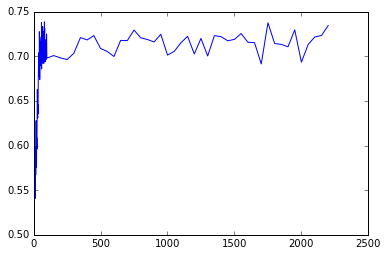

In [39]:
plt.plot(NUM_FEATURES, score_record / trial * len(NUM_FEATURES))

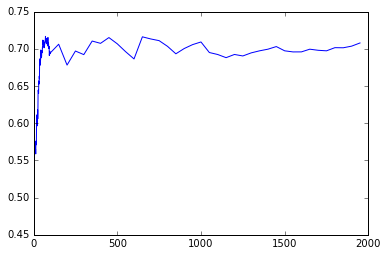

In [12]:
plt.plot(NUM_FEATURES, score_record)
plt.ylim(0.45, 0.75)
plt.show()

In [9]:
score_record = score_record / 100 

In [13]:
score_record

array([ 0.56433333,  0.56338095,  0.56061905,  0.545     ,  0.56252381,
        0.56804762,  0.56185714,  0.56295238,  0.57280952,  0.56661905,
        0.5607619 ,  0.56485714,  0.55871429,  0.57595238,  0.57085714,
        0.57157143,  0.57852381,  0.60533333,  0.61114286,  0.60871429,
        0.60028571,  0.59652381,  0.5972381 ,  0.61795238,  0.60580952,
        0.61685714,  0.64338095,  0.64461905,  0.64280952,  0.64004762,
        0.65680952,  0.65257143,  0.654     ,  0.66319048,  0.65961905,
        0.6822381 ,  0.6807619 ,  0.68657143,  0.6837619 ,  0.67804762,
        0.68171429,  0.68595238,  0.69838095,  0.69290476,  0.69219048,
        0.69290476,  0.68795238,  0.69014286,  0.69742857,  0.69452381,
        0.69738095,  0.69780952,  0.70261905,  0.70128571,  0.71161905,
        0.70685714,  0.70552381,  0.70561905,  0.71133333,  0.70566667,
        0.7042381 ,  0.70485714,  0.70138095,  0.70766667,  0.70404762,
        0.70542857,  0.70961905,  0.71033333,  0.71104762,  0.71

In [35]:
data, label = make_dataset(v_spec, a_spec, shuffle=True)
cross_valid = cross_validation(data, label, n=10)

[84, 134, 46, 1, 132, 13, 67, 18, 80, 137, 2, 17, 4, 131, 118, 97, 74, 88, 127, 22, 113, 6, 20, 82, 138, 36, 72, 0, 54, 135, 56, 62, 121, 96, 139, 79, 28, 24, 29, 103, 111, 15, 129, 47, 66, 75, 33, 105, 95, 91, 133, 94, 122, 61, 14, 102, 8, 23, 37, 3, 40, 16, 116, 11, 99, 128, 73, 115, 21, 39, 104, 64, 112, 119, 101, 51, 48, 117, 65, 7, 71, 130, 27, 136, 77, 43, 87, 98, 30, 12, 35, 53, 42, 19, 38, 106, 89, 83, 49, 25, 31, 114, 59, 68, 26, 85, 10, 93, 69, 90, 52, 70, 45, 125, 34, 108, 5, 63, 41, 44, 92, 124, 50, 78, 126, 100, 81, 60, 107, 55, 141, 110, 76, 109, 140, 32, 120, 9, 58, 123, 86, 57]


In [34]:
cross_valid[0][3].shape

(15,)